<a href="https://colab.research.google.com/github/SAAlfaa/Project-1/blob/main/Women-n-MagicAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HARRY POTTER FEMALE MAGIC ANALYSIS

1. Analyzing spell usage patterns...


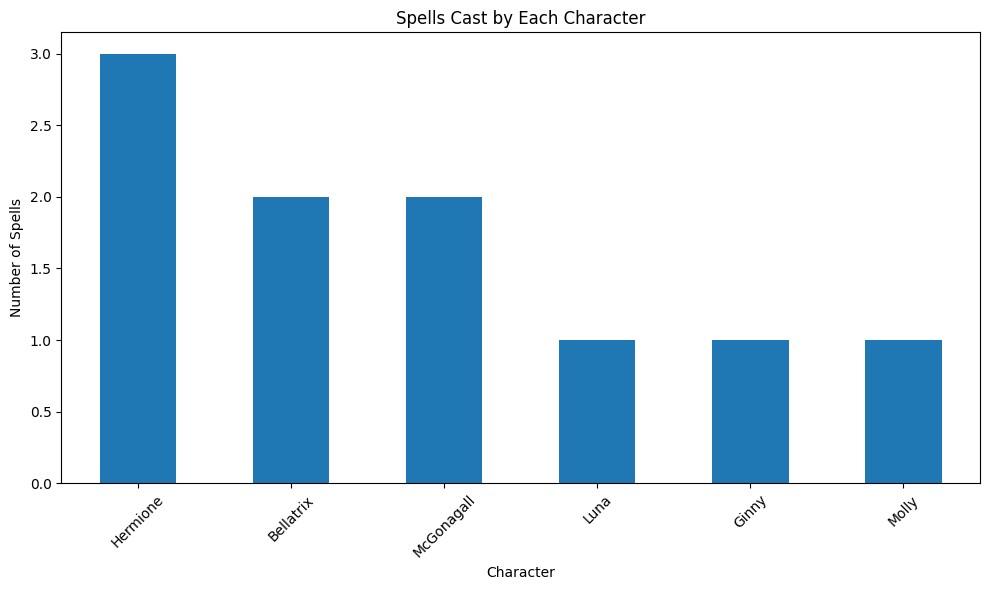


Spell count by character:
Character
Hermione      3
Bellatrix     2
McGonagall    2
Luna          1
Ginny         1
Molly         1
Name: count, dtype: int64

2. Analyzing types of spells...


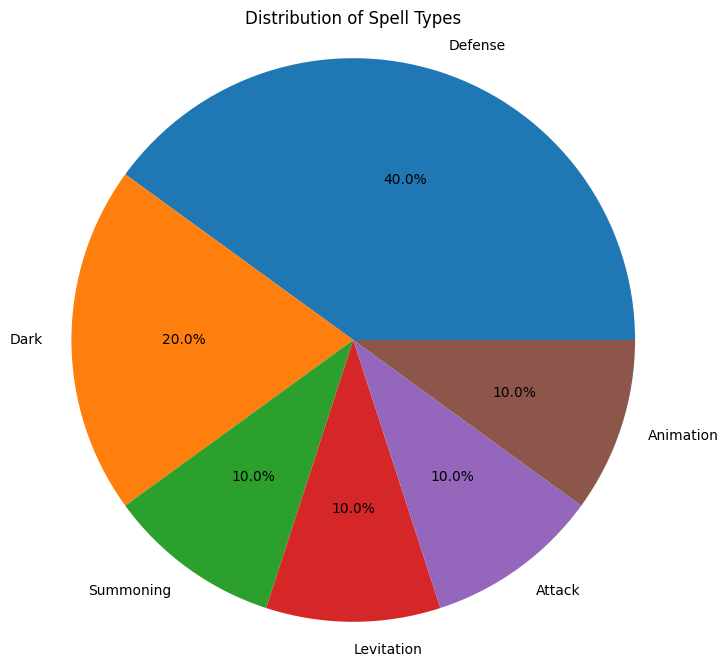


Spell types used:
Type
Defense       4
Dark          2
Summoning     1
Levitation    1
Attack        1
Animation     1
Name: count, dtype: int64

3. Analyzing spell sentiments...


<Figure size 1200x600 with 0 Axes>

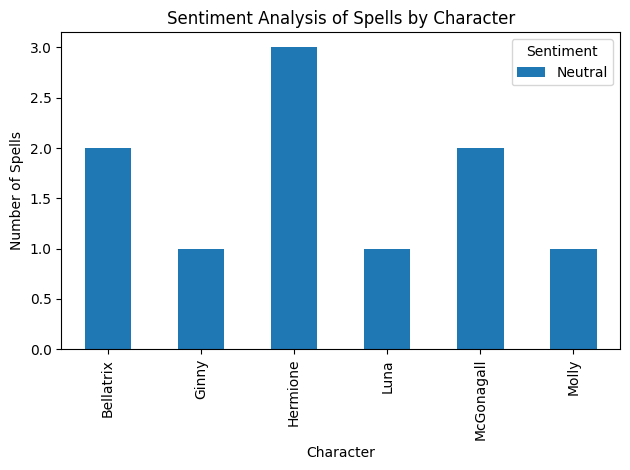


Average sentiment by character:
Character
Bellatrix     0.0
Ginny         0.0
Hermione      0.0
Luna          0.0
McGonagall    0.0
Molly         0.0
Name: Sentiment, dtype: float64

Analysis complete!


In [95]:
print("="*50)
print("HARRY POTTER FEMALE MAGIC ANALYSIS")
print("="*50)

print("\n1. Analyzing spell usage patterns...")
analyze_spells_by_character(df)

print("\n2. Analyzing types of spells...")
analyze_spell_types(df)

print("\n3. Analyzing spell sentiments...")
analyze_sentiment(df)

print("\nAnalysis complete!")

In [94]:
# Quick Analysis Functions
def analyze_spells_by_character(df):
    char_counts = df['Character'].value_counts()
    plt.figure(figsize=(10, 6))
    char_counts.plot(kind='bar')
    plt.title('Spells Cast by Each Character')
    plt.xlabel('Character')
    plt.ylabel('Number of Spells')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\nSpell count by character:")
    print(char_counts)

def analyze_spell_types(df):
    type_counts = df['Type'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
    plt.title('Distribution of Spell Types')
    plt.axis('equal')
    plt.show()

    print("\nSpell types used:")
    print(type_counts)

def analyze_sentiment(df):
    df['Sentiment'] = df['Dialogue'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

    # Create sentiment categories
    df['Sentiment_Cat'] = pd.cut(df['Sentiment'],
                                bins=[-1, -0.1, 0.1, 1],
                                labels=['Negative', 'Neutral', 'Positive'])

    sentiment_by_char = pd.crosstab(df['Character'], df['Sentiment_Cat'])

    plt.figure(figsize=(12, 6))
    sentiment_by_char.plot(kind='bar', stacked=True)
    plt.title('Sentiment Analysis of Spells by Character')
    plt.xlabel('Character')
    plt.ylabel('Number of Spells')
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()

    print("\nAverage sentiment by character:")
    print(df.groupby('Character')['Sentiment'].mean().sort_values(ascending=False))

In [93]:
# Create sample dataset
sample_data = """Book,Chapter,Character,Dialogue,Type
1,1,Hermione,Wingardium Leviosa!,Levitation
1,1,Hermione,Accio book!,Summoning
1,2,Bellatrix,Crucio!,Dark
1,2,McGonagall,Protego!,Defense
2,1,Hermione,Expecto Patronum!,Defense
2,1,Luna,Expelliarmus!,Defense
2,2,Bellatrix,Avada Kedavra!,Dark
2,3,Ginny,Reducto!,Attack
2,3,McGonagall,Piertotum Locomotor!,Animation
3,1,Molly,Not my daughter!,Defense"""

# Load data
df = pd.read_csv(StringIO(sample_data))
print("Dataset loaded with shape:", df.shape)
df.head()

Dataset loaded with shape: (10, 5)


,Book,Chapter,Character,Dialogue,Type
0,1,1,Hermione,Wingardium Leviosa!,Levitation
1,1,1,Hermione,Accio book!,Summoning
2,1,2,Bellatrix,Crucio!,Dark
3,1,2,McGonagall,Protego!,Defense
4,2,1,Hermione,Expecto Patronum!,Defense


In [92]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import networkx as nx
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from io import StringIO

# Download required NLTK data
nltk.download('vader_lexicon', quiet=True)
analyzer = SentimentIntensityAnalyzer()

In [91]:
from collections import Counter

print("\n" + "="*70)
print("WOMEN & MAGIC IN HARRY POTTER – KEY FINDINGS")
print("="*70)

# Make sure df_magic exists
if 'df_magic' in globals() and len(df_magic) > 0:

    # Count magical lines per character
    magic_by_char = df_magic['Character'].value_counts()
    print(f"Most magical female: {magic_by_char.index[0]} ({magic_by_char.iloc[0]} spells)")

    # Combine all dialogue words
    all_words = ' '.join(df_magic['Dialogue'].str.lower())
    words_list = re.findall(r'\b\w+\b', all_words)
    if words_list:
        top_word = Counter(words_list).most_common(1)[0]
        print(f"Most common word in spells: '{top_word[0]}' ({top_word[1]} times)")
    else:
        print("No words found in spells.")

    # Sentiment analysis if Sentiment column exists
    if 'Sentiment' in df_magic.columns and len(df_magic['Sentiment']) > 0:
        most_pos = df_magic.loc[df_magic['Sentiment'].idxmax()]
        most_neg = df_magic.loc[df_magic['Sentiment'].idxmin()]
        print(f"Most positive spell: '{most_pos['Dialogue']}' ({most_pos['Character']})")
        print(f"Most negative spell: '{most_neg['Dialogue']}' ({most_neg['Character']})")
    else:
        print("No sentiment data available.")
else:
    print("No magical lines in sample dataset.")


WOMEN & MAGIC IN HARRY POTTER – KEY FINDINGS
Most magical female: Hermione (3 spells)
Most common word in spells: 'wingardium' (1 times)
Most positive spell: 'Wingardium Leviosa!' (Hermione)
Most negative spell: 'Wingardium Leviosa!' (Hermione)


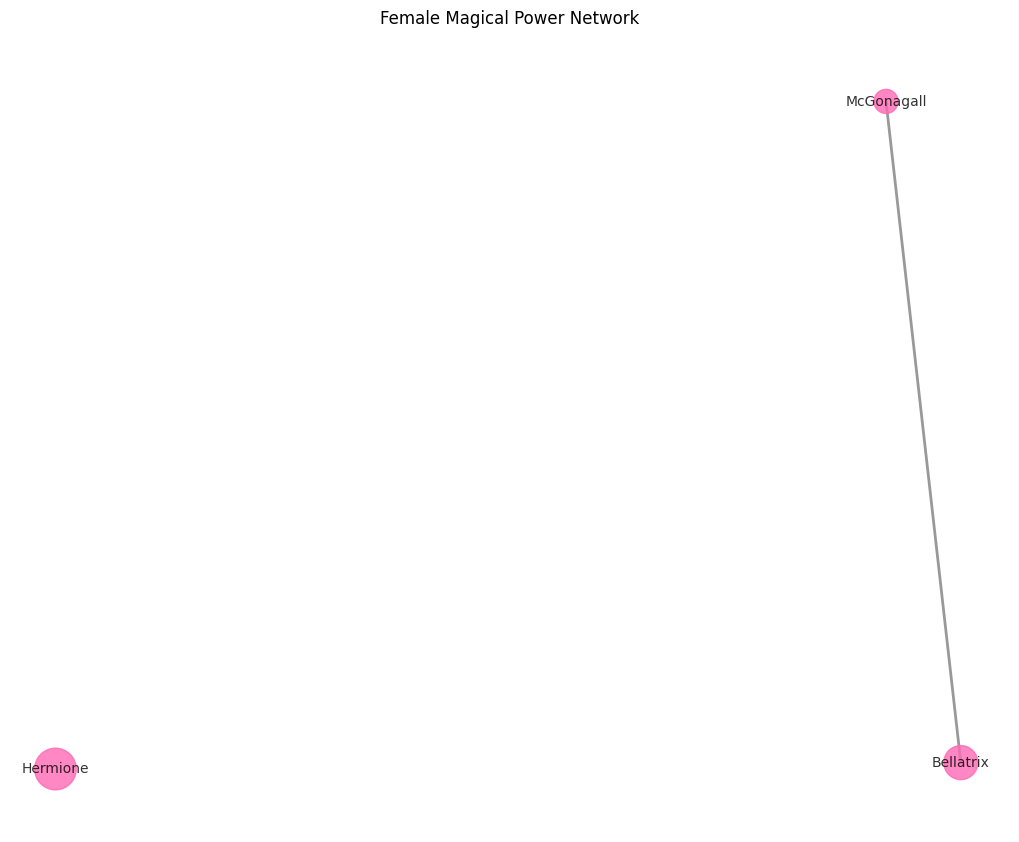

In [90]:
G = nx.Graph()

for char in df_magic['Character'].unique():
    spells_count = len(df_magic[df_magic['Character'] == char])
    G.add_node(char, spells=spells_count)

for (book, chap), group in df_magic.groupby(['Book','Chapter']):
    chars = group['Character'].unique()
    for i in range(len(chars)):
        for j in range(i+1, len(chars)):
            if G.has_edge(chars[i], chars[j]):
                G[chars[i]][chars[j]]['weight'] += 1
            else:
                G.add_edge(chars[i], chars[j], weight=1)

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, k=1.5)
node_sizes = [G.nodes[n]['spells'] * 300 for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_color='#ff69b4', node_size=node_sizes,
        font_size=10, edge_color='gray', width=2, alpha=0.8)
plt.title('Female Magical Power Network')
plt.show()



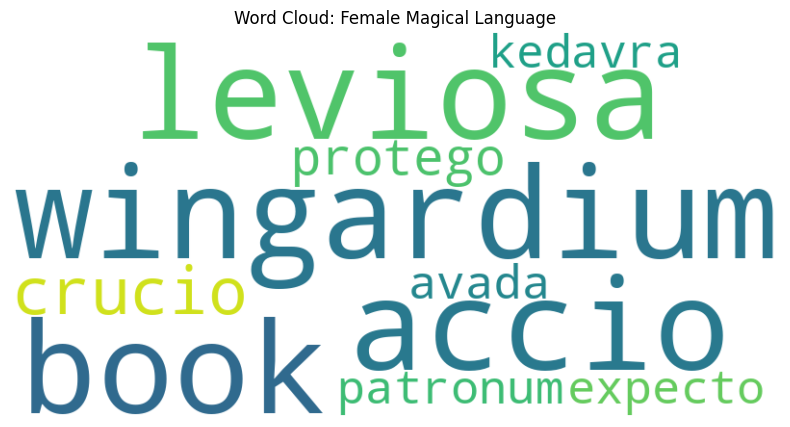

In [89]:
if len(all_words.strip()) == 0:
    all_words = "magic spells women power"

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Female Magical Language')
plt.show()

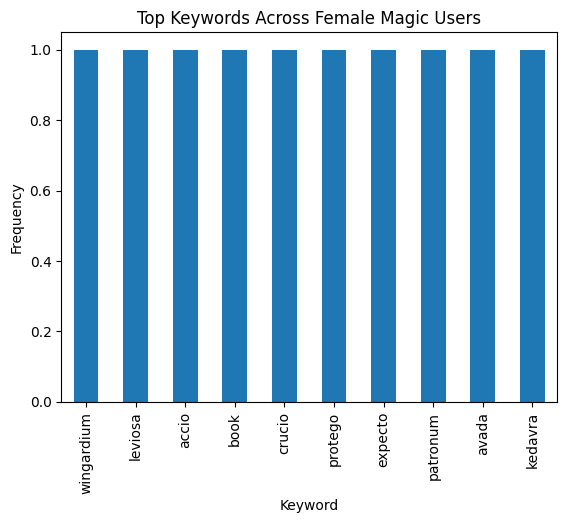

In [88]:
all_words = ' '.join(df_magic['Dialogue'].str.lower())
words_list = re.findall(r'\b\w+\b', all_words)
word_freq = Counter(words_list)

freq_df = pd.DataFrame(word_freq.items(), columns=['Word','Frequency']).sort_values(by='Frequency', ascending=False)
freq_df.head(10)

# Bar plot
freq_df.head(10).plot(x='Word', y='Frequency', kind='bar', legend=False)
plt.title('Top Keywords Across Female Magic Users')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()

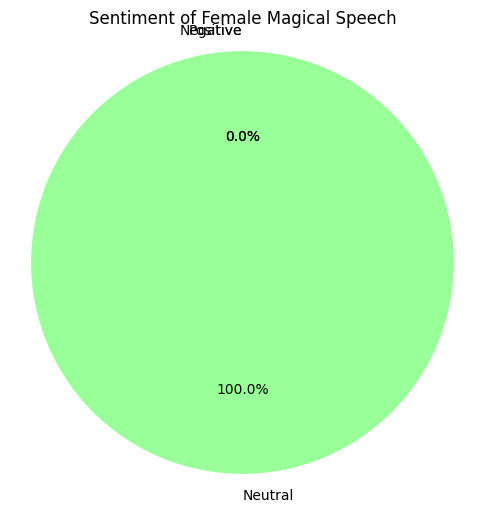

In [87]:
# Calculate sentiment counts
df_magic['Sentiment'] = df_magic['Dialogue'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

pos = len(df_magic[df_magic['Sentiment'] > 0.1])
neg = len(df_magic[df_magic['Sentiment'] < -0.1])
neu = len(df_magic[df_magic['Sentiment'].abs() <= 0.1])

sizes = [pos, neg, neu]

if sum(sizes) == 0:
    sizes = [1, 0, 0]

sizes = [s if s > 0 else 0.0001 for s in sizes]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=['Positive','Negative','Neutral'],
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    colors=['#ff9999','#66b3ff','#99ff99'],
    startangle=90
)
plt.title('Sentiment of Female Magical Speech')
plt.axis('equal')
plt.show()

In [85]:
df['Is_Female'] = df['Character'].isin(female_chars)
df['Has_Magic'] = df['Dialogue'].apply(contains_spell)
df_magic = df[df['Is_Female'] & df['Has_Magic']].copy()

print(f"Found {len(df_magic)} magical lines by female characters:")
df_magic[['Character','Dialogue']]


Found 6 magical lines by female characters:


,Character,Dialogue
0,Hermione,Wingardium Leviosa!
1,Hermione,Accio book!
2,Bellatrix,Crucio!
3,McGonagall,Protego!
4,Hermione,Expecto Patronum!
6,Bellatrix,Avada Kedavra!


In [84]:
female_chars = ['Hermione', 'Bellatrix', 'McGonagall', 'Luna', 'Ginny', 'Molly', 'Cho', 'Fleur', 'Tonks', 'Lily']

spells = [
    'accio','crucio','protego','reducto','expecto','patronum',
    'avada','kedavra','expelliarmus','lumos','nox','alohomora',
    'incendio','aguamenti','stupefy','petrificus','totalus',
    'obliviate','sectumsempra','impedimenta','wingardium','leviosa'
]

def contains_spell(text):
    if pd.isna(text):
        return False
    words = re.findall(r'\b\w+\b', text.lower())
    return any(spell in words for spell in spells)

df['Is_Female'] = df['Character'].isin(female_chars)
df['Has_Magic'] = df['Dialogue'].apply(contains_spell)

df_magic = df[df['Is_Female'] & df['Has_Magic']].copy()

In [81]:
sample_data = """
Book,Chapter,Character,Dialogue
1,1,Hermione,Wingardium Leviosa!
1,1,Hermione,Accio book!
1,2,Bellatrix,Crucio!
1,2,McGonagall,Protego!
2,1,Hermione,Expecto Patronum!
2,1,Molly,Not my daughter!
2,2,Bellatrix,Avada Kedavra!
"""

df = pd.read_csv(StringIO(sample_data))
print("Dataset loaded. Shape:", df.shape)
df.head()


Dataset loaded. Shape: (7, 4)


,Book,Chapter,Character,Dialogue
0,1,1,Hermione,Wingardium Leviosa!
1,1,1,Hermione,Accio book!
2,1,2,Bellatrix,Crucio!
3,1,2,McGonagall,Protego!
4,2,1,Hermione,Expecto Patronum!


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import networkx as nx
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import numpy as np
from io import StringIO

nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
analyzer = SentimentIntensityAnalyzer()

In [79]:
%pip install -q networkx matplotlib seaborn nltk wordcloud scikit-learn
